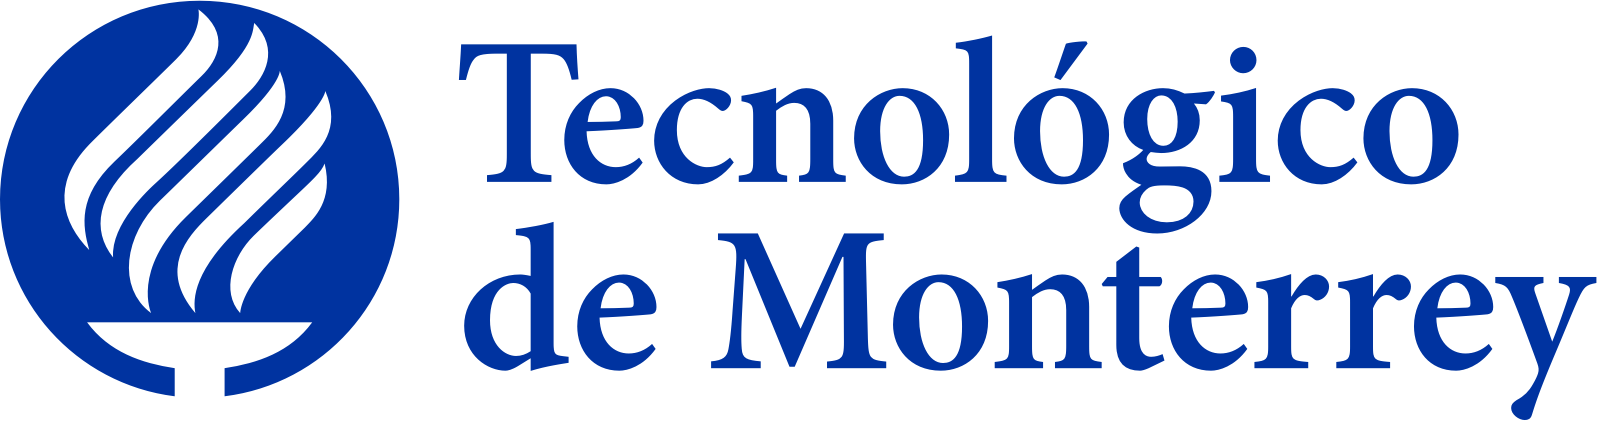

**Materia: Proyecto Integrador** <br>
Profesores titulares: <br>
Dra. Grettel Barceló Alonso <br>
Dr. Luis Eduardo Falcón Morales
                      
Nombre: Francisco Javier Hernandez Camarillo <br>
Matricula: a00998083

***Avance 3. Ingeniería de características*** <br>
Equipo. 24

Introducción
El Análisis Exploratorio de Datos (EDA) es un paso crucial en cualquier proyecto de ciencia de datos, proporcionando una comprensión profunda de la naturaleza y las características de los datos. Sin embargo, cuando se trata de un conjunto de datos compuesto exclusivamente por imágenes, el enfoque tradicional del EDA, generalmente aplicado a datos tabulares, se tuvo que adapatar para nuestro proyecto. 

EDA para Imágenes
En nuestro caso, el conjunto de datos consta únicamente de imágenes. A diferencia de los datos tabulares. Por lo tanto, en lugar de centrarnos en estadísticas descriptivas y correlaciones, que son típicas en el EDA tradicional, hemos aplicado técnicas de procesamiento y análisis de imágenes.

In [ ]:
##!pip install scikit-learn

In [ ]:
##!pip install labelme

In [ ]:
##!pip install ultralytics

In [ ]:
##!pip install labelme2yolo

In [ ]:
##!pip install torch torchvision torchaudio

In [2]:
import torch

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.feature import local_binary_pattern
from sklearn.cluster import KMeans

Lectura de datos.  <br>
Se empezo por localizar las imagenes y obtener las rutas de acceso a ellas que se guardaron en una lista.

In [6]:
# Ruta del directorio donde están tus imágenes
image_directory = r'C:\Users\javier\Documents\proyectoFinal\imagenesConectores'

# Lista para almacenar los nombres de las imágenes
image_names = []

# Iterar sobre cada archivo en el directorio
for filename in os.listdir(image_directory):
    if filename.lower().endswith(('.png')):  
        image_names.append(filename)

# Ahora image_names contiene los nombres de todas las imágenes
print("Total de imágenes:", len(image_names))

Total de imágenes: 107


Se grafico el tamano de cada imagen

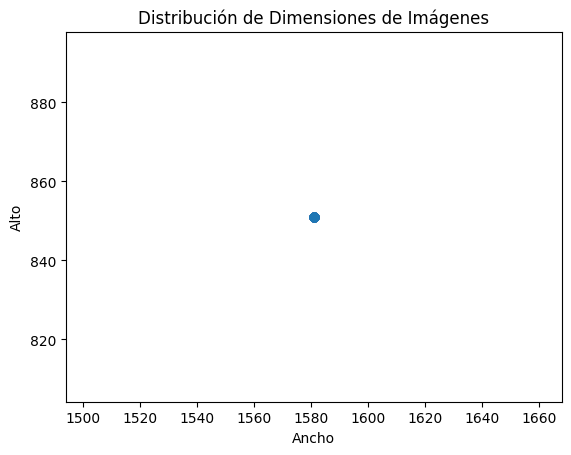

In [7]:
# Leer imágenes
image_sizes = []
for filename in os.listdir(image_directory):
    if filename.endswith('.png'):  # Asegúrate de cambiar la extensión si es necesario
        filepath = os.path.join(image_directory, filename)
        with Image.open(filepath) as img:
            image_sizes.append(img.size)

# Visualización de tamaños de imágenes
widths, heights = zip(*image_sizes)
plt.scatter(widths, heights)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.title('Distribución de Dimensiones de Imágenes')
plt.show()

In [8]:
print(widths, heights)

(1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581) (851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 8

Ploteamos 5 ejemplos de las 110 imagenes

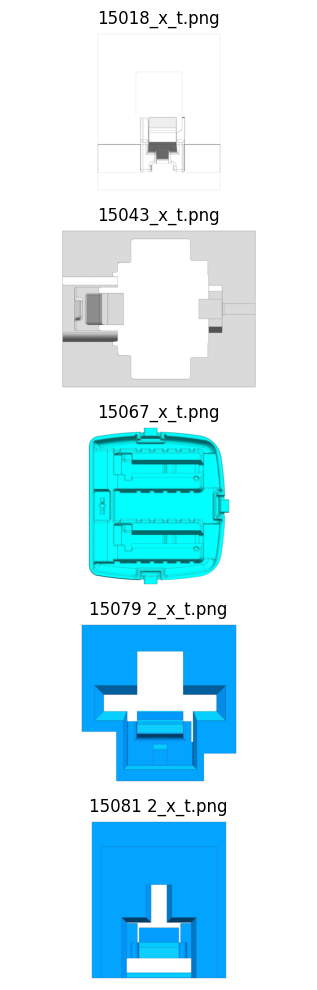

In [23]:
# Obtener los nombres de los archivos de las primeras cinco imágenes
image_files = image_names[:5]

# Configurar el entorno de matplotlib para mostrar las imágenes
fig, axes = plt.subplots(5, 1, figsize=(10, 10))  # Ajusta el tamaño según sea necesario
axes = axes.flatten()

# Cargar y mostrar cada imagen
for ax, image_file in zip(axes, image_files):
    image_path = os.path.join(image_directory, image_file)
    image = Image.open(image_path)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(image_file)

plt.tight_layout()
plt.show()

**Análisis de Color y Textura:** <br> Dado que las imágenes son principalmente visuales, se analizaron aspectos como la distribución del color y las texturas. Estas características son esenciales para entender patrones visuales que no pueden ser capturados a través de métodos estadísticos convencionales.

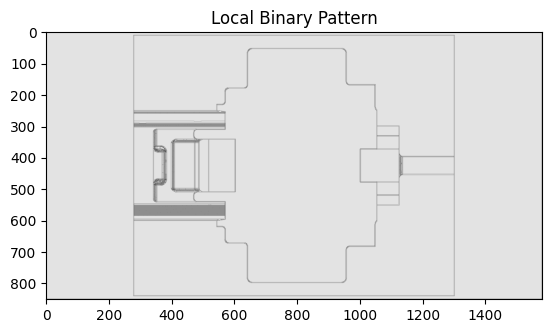

In [24]:
# Función para calcular y mostrar LBP
def show_lbp(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    lbp = local_binary_pattern(image, P=8, R=1, method='uniform')
    plt.imshow(lbp, cmap='gray')
    plt.title('Local Binary Pattern')
    plt.show()

# Ejemplo de uso
image_path = os.path.join(image_directory, image_names[1])
show_lbp(image_path)

**Uso de la Detección de Bordes de Canny:** <br> Implementamos la detección de bordes de Canny para resaltar y analizar los contornos y bordes dentro de las imágenes. Esta técnica es particularmente útil para comprender la estructura y forma en las imágenes, lo que puede ser crucial para ciertas aplicaciones como el reconocimiento de objetos o la segmentación.

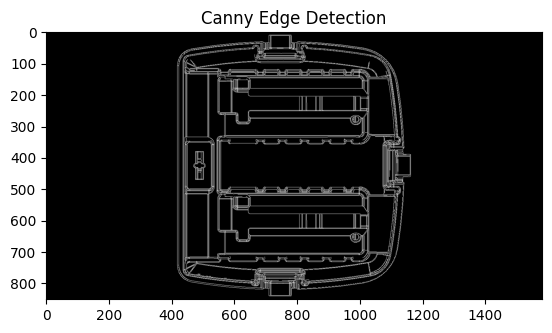

In [25]:
def show_edges(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 100, 200)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.show()

# Ejemplo de uso
image_path = os.path.join(image_directory, image_names[2])
show_edges(image_path)

**Segmentación de Imágenes:** <br> Aplicamos técnicas de segmentación, como K-means, para dividir las imágenes en diferentes regiones basadas en características similares. Esto ayuda a entender cómo se componen las imágenes y a identificar patrones o anomalías específicos de ciertas regiones.

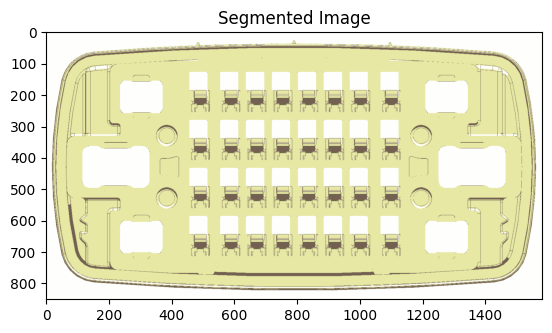

In [26]:
def segment_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    kmeans = KMeans(n_clusters=3)
    kmeans.fit(pixel_values)
    centers = np.uint8(kmeans.cluster_centers_)
    labels = kmeans.labels_
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)

    plt.imshow(segmented_image)
    plt.title('Segmented Image')
    plt.show()

# Ejemplo de uso
image_path = os.path.join(image_directory, image_names[9])
segment_image(image_path)


**Normalización:** <br> Las imágenes se normalizaron para llevar todos los valores de píxeles al mismo rango (0-1). Esto es fundamental para preparar las imágenes para procesos de análisis y modelado posteriores, ya que ayuda a reducir las discrepancias en la escala y mejora la eficiencia del entrenamiento de modelos de aprendizaje automático.

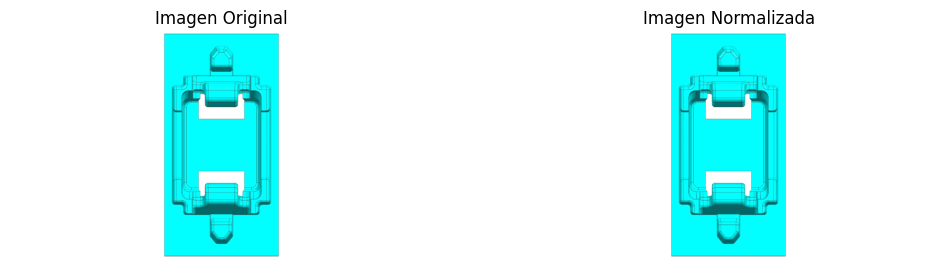

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1

In [27]:
def load_and_normalize_image(image_path):
    # Cargar imagen
    image = Image.open(image_path)
    image_array = np.array(image)

    # Normalizar la imagen
    normalized_image_array = image_array / 255.0

    return image_array, normalized_image_array

# Ruta a tu imagen
image_path = os.path.join(image_directory, image_names[11])

# Cargar y normalizar la imagen
original, normalized = load_and_normalize_image(image_path)

# Mostrar ambas imágenes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original)
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(normalized)
axes[1].set_title('Imagen Normalizada')
axes[1].axis('off')

plt.show()
print(original)
print(normalized)

Conclusión
Nuestro EDA para este conjunto de datos de imágenes implicó adaptar y aplicar técnicas específicas para el análisis visual. Al hacerlo, pudimos obtener insights valiosos que van más allá de lo que los métodos tradicionales podrían revelar, preparándonos así para pasos más avanzados en nuestro proyecto, como el modelado y la clasificación.

# Avance #2

etiquetado de las imagenes <br>
LabelMe es una aplicación de anotación de imágenes para Python que permite la anotación de imágenes con etiquetas de objetos. 

empezamos abriendo label me desde una consola de powershell.
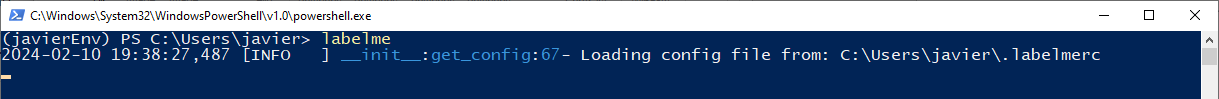

Abajo se muestra el proceso de etiquetado en labelme. Se etiquetaron 107 imagenes

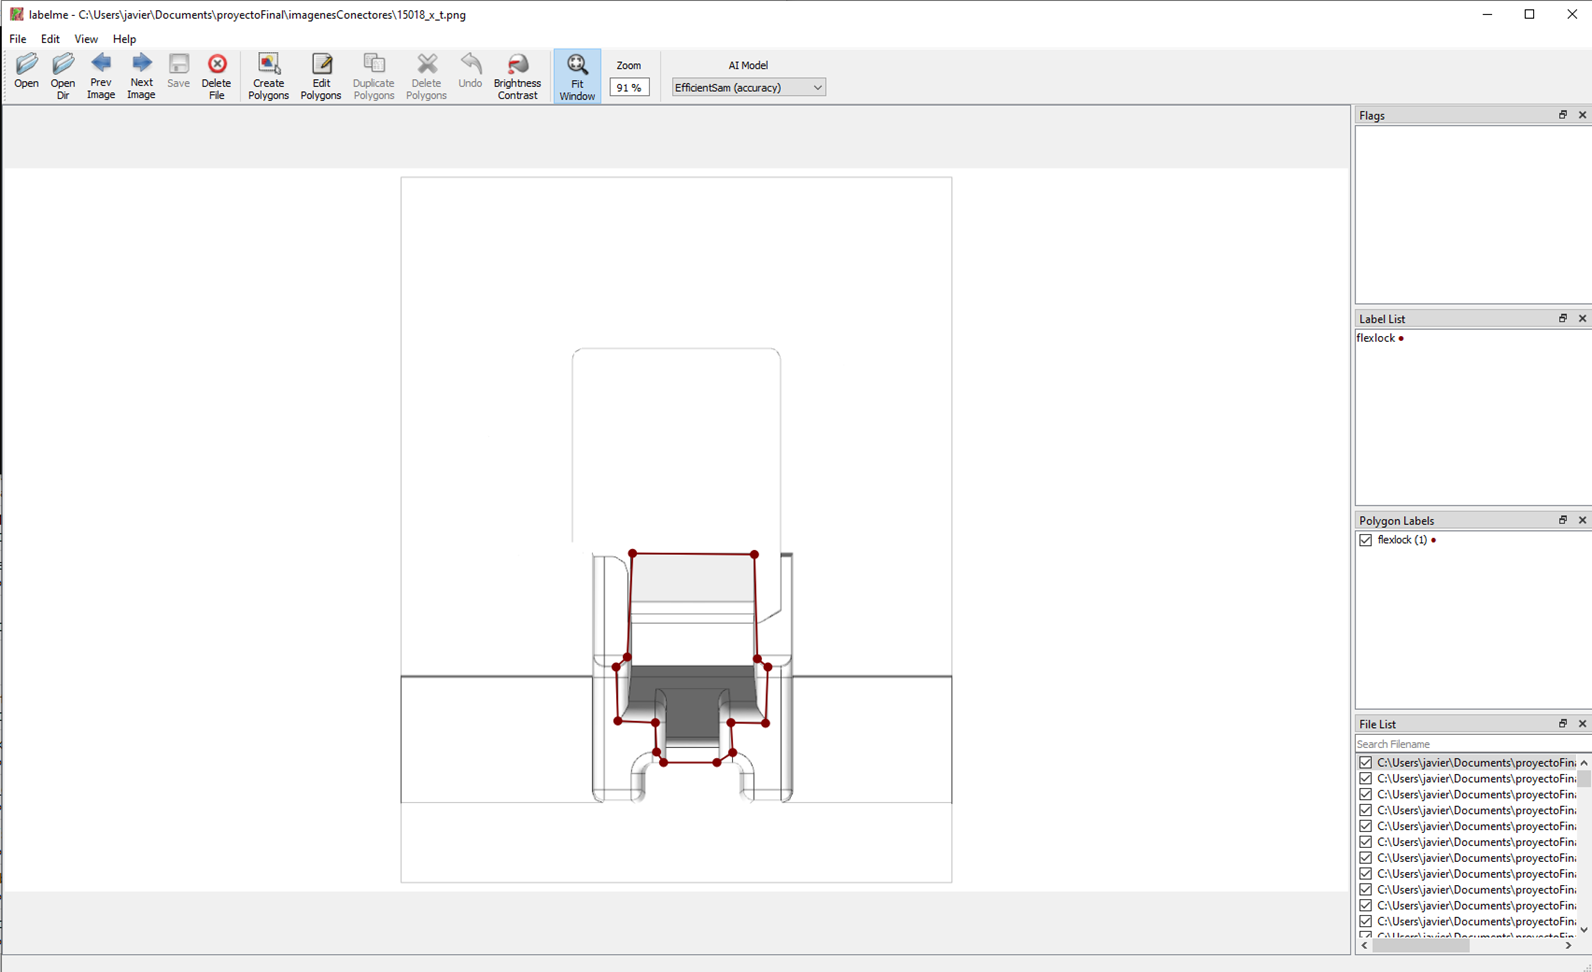

LabelMe no guarda las anotaciones en el formato específico de YOLO por defecto, guardamos las antoaciones en formato .json. Podemos revisar el resultado del etiquetado con el sigiente comando en consola

`labelme_draw_json  C:/Users/javier/Documents/proyectoFinal/imagenesConectores/15117_x_t.json`

abajo se muestran algunas capturas que se obtuvieron con este codigo.


In [20]:
from PIL import Image

image_directory_2 = r"C:\Users\javier\Documents\proyectoFinal\imagenesparajupyter/"

# Rutas a las imágenes
imagen1_path = os.path.join(image_directory_2,'Picture1.png')
imagen2_path = os.path.join(image_directory_2,'Picture2.png')
imagen3_path = os.path.join(image_directory_2,'Picture3.png')
imagen4_path = os.path.join(image_directory_2,'Picture4.png')

# Carga las imágenes
imagen1 = Image.open(imagen1_path)
imagen2 = Image.open(imagen2_path)
imagen3 = Image.open(imagen3_path)
imagen4 = Image.open(imagen4_path)

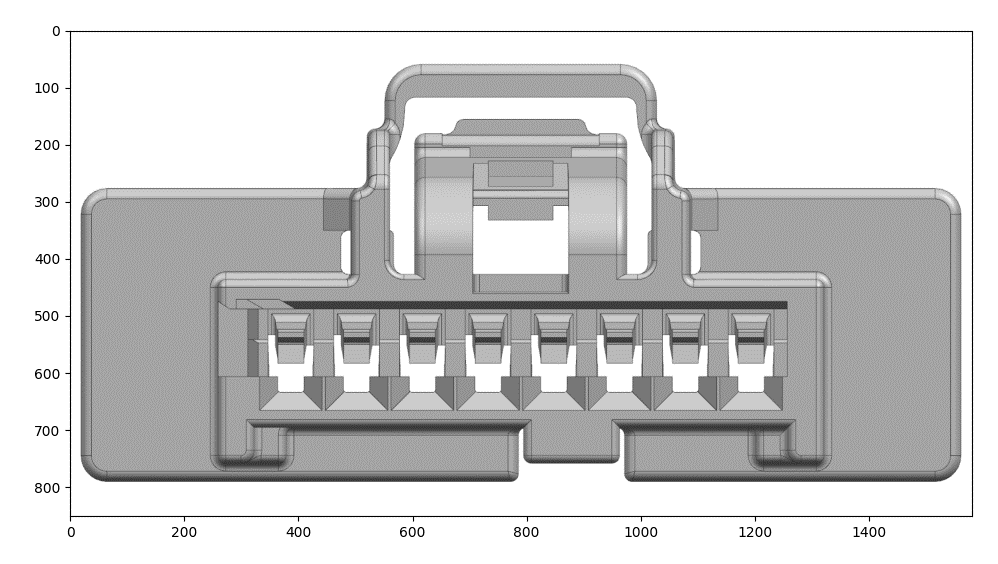

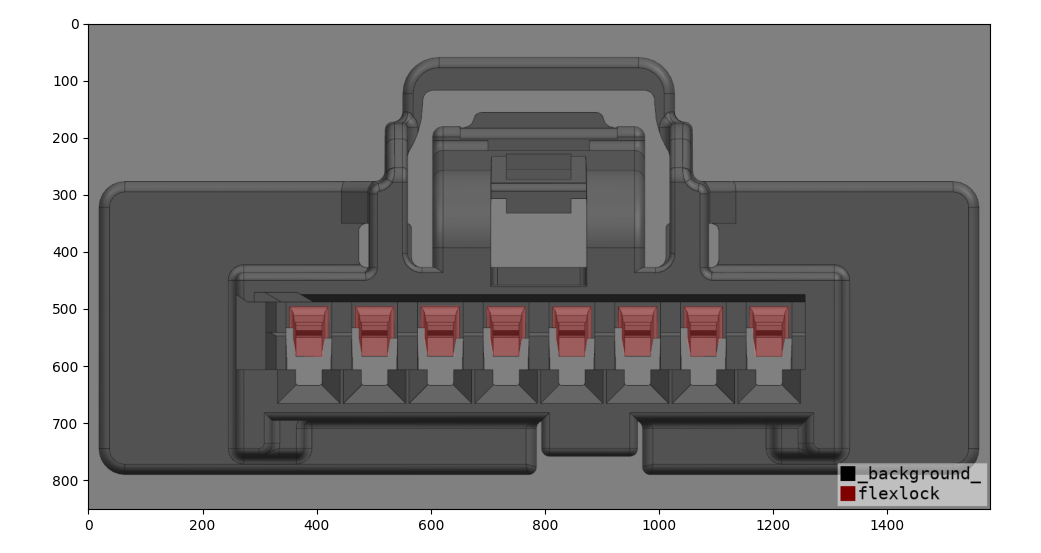

In [21]:
display(imagen1, imagen2)

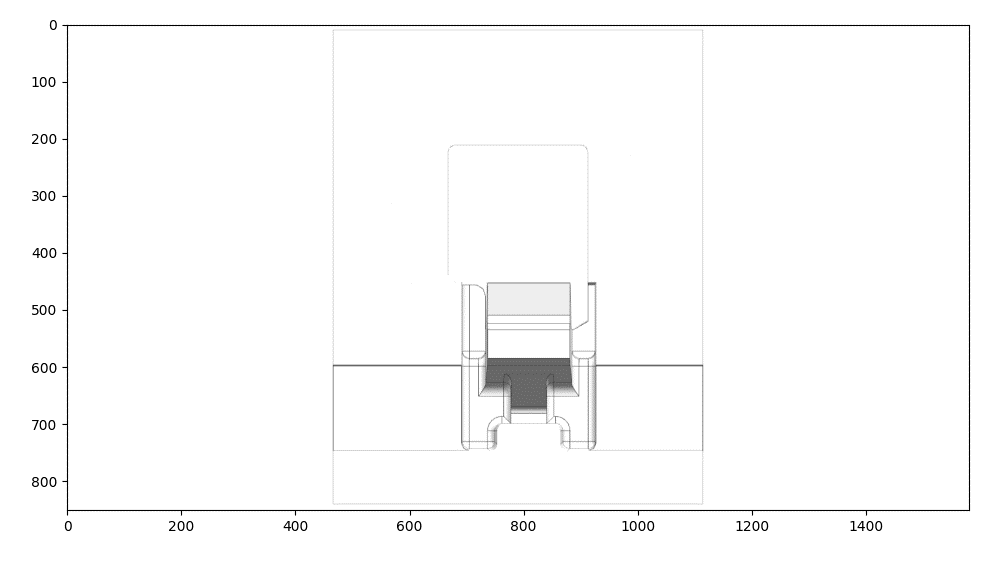

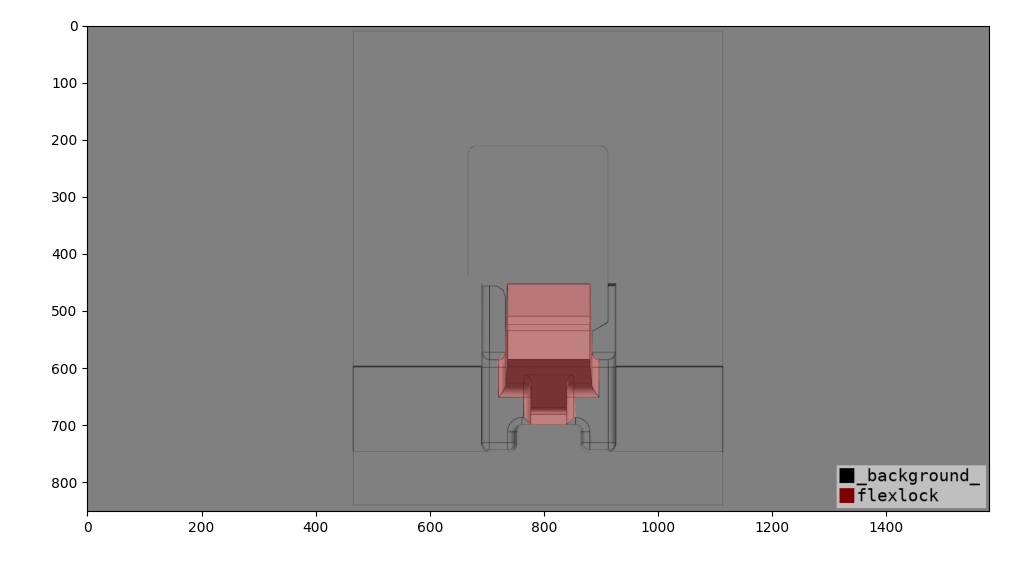

In [23]:
display(imagen3, imagen4)

Despues de esto tenemos que localizar el archivo de las imagenes , y correr el siguiente script que convertira los archivos generados en label a formato yolo

`labelme2yolo --json_dir test`

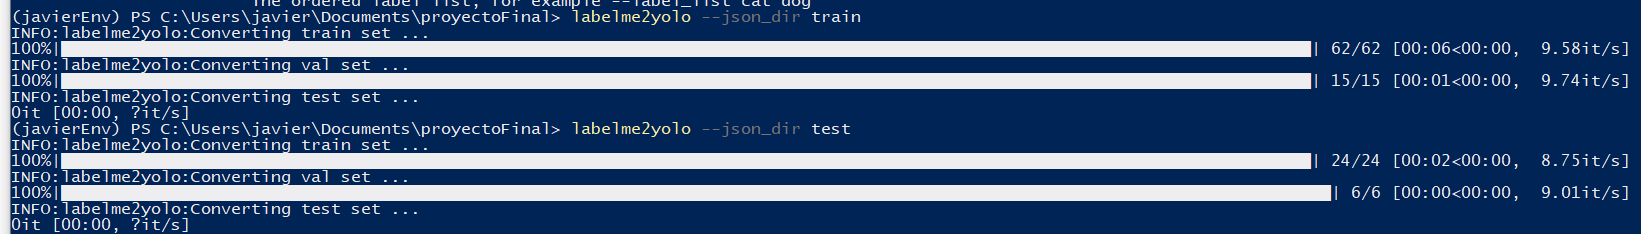

Los archivos resultates se guadan en una carpeta que contiene las imagenes y las etiquetas en archivo .txt.

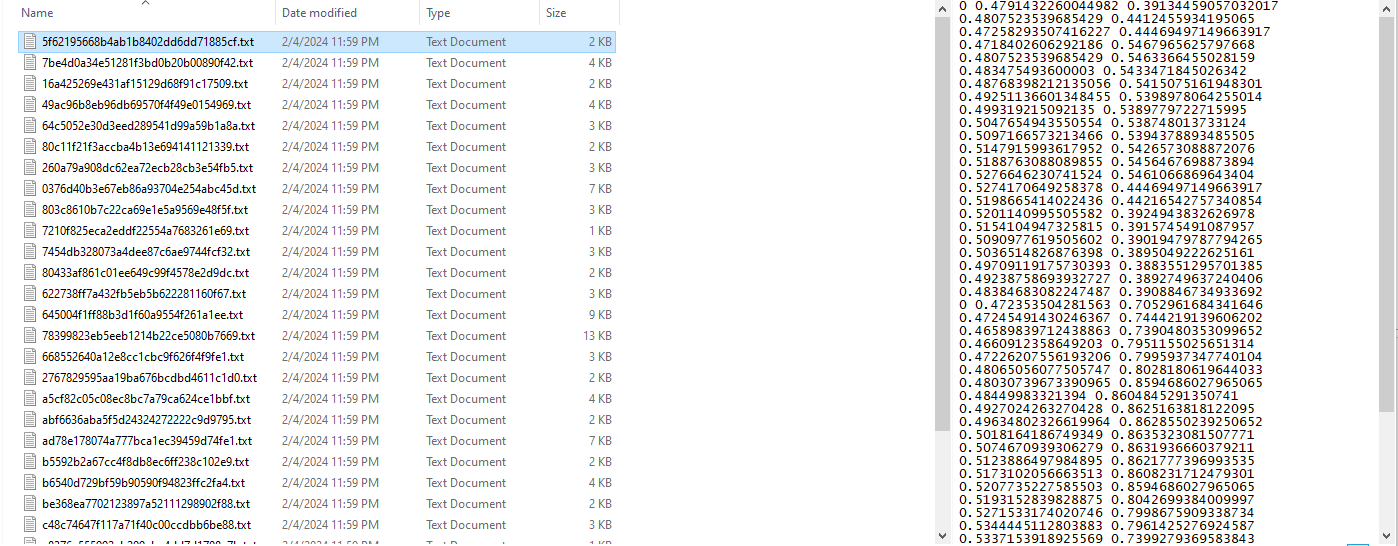

el archivo .txt contiene cada uno de los puntos de la plilinea que creamos sobre la imagen,expresados en puntos X,Y.

Con esto queda listo el pre-proceso de la identificacion de objetos que se usaran para entrenar el modelo YOLOv8

# Avance 3

Procedimos a hacer el entrenamiento de YOLO una vez que se crearon las carpetas Train y test con imagenes y archivos txt.
se dividio aproximadamente 80-20.

Se uso el siguiente comando para entrenar el modelo.

`yolo task=segment mode=train epochs=8 data=dataset.yaml model=yolov8m-seg.pt imgsz=851 batch=8`

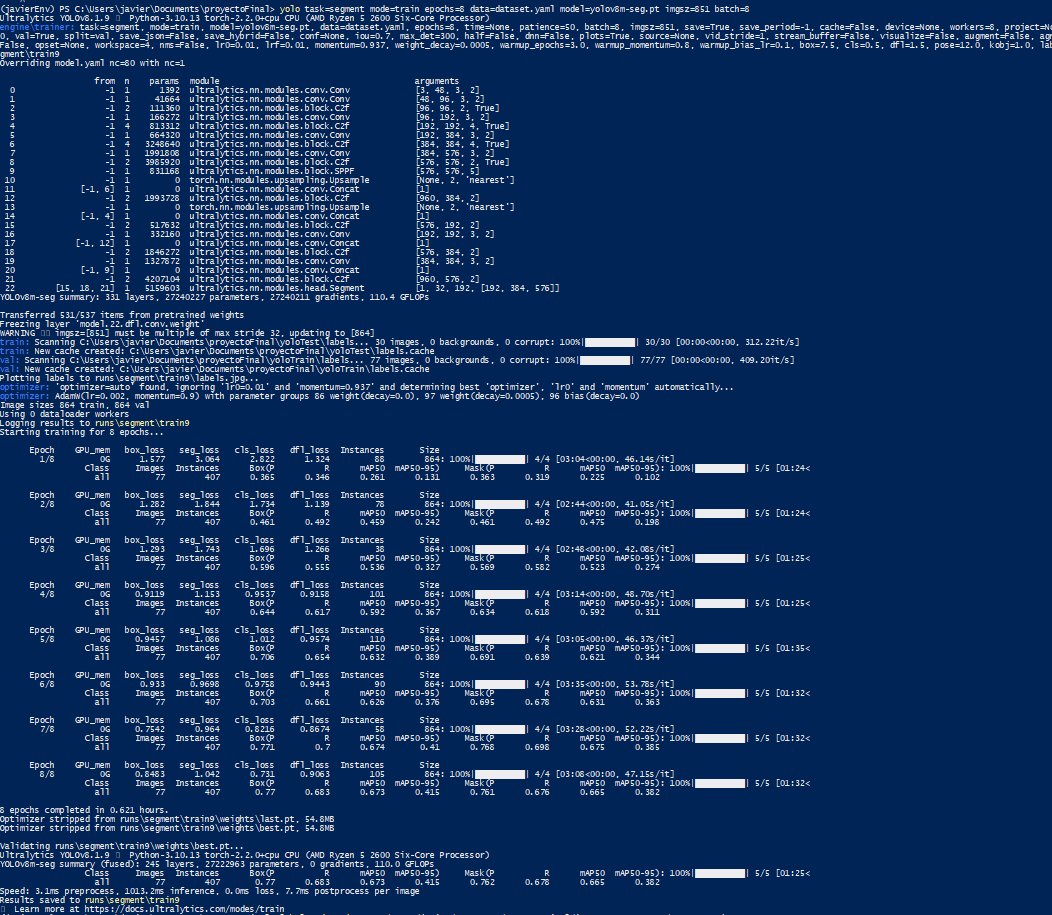



esto creo una folder en la direccion de origen llamado runs. la cual contiene el modelo entrenado final "last.pt" y algunas de las siguientes metricas:

- BoxF1 curve
- BoxP curve
- BoxPR curve
- BoxR curve
- Confusion matrix
- Confusion matrix normalized
- labels correlogram
- maskF1 curve
- maskP cruve
- maskPR curve
- MasR curve

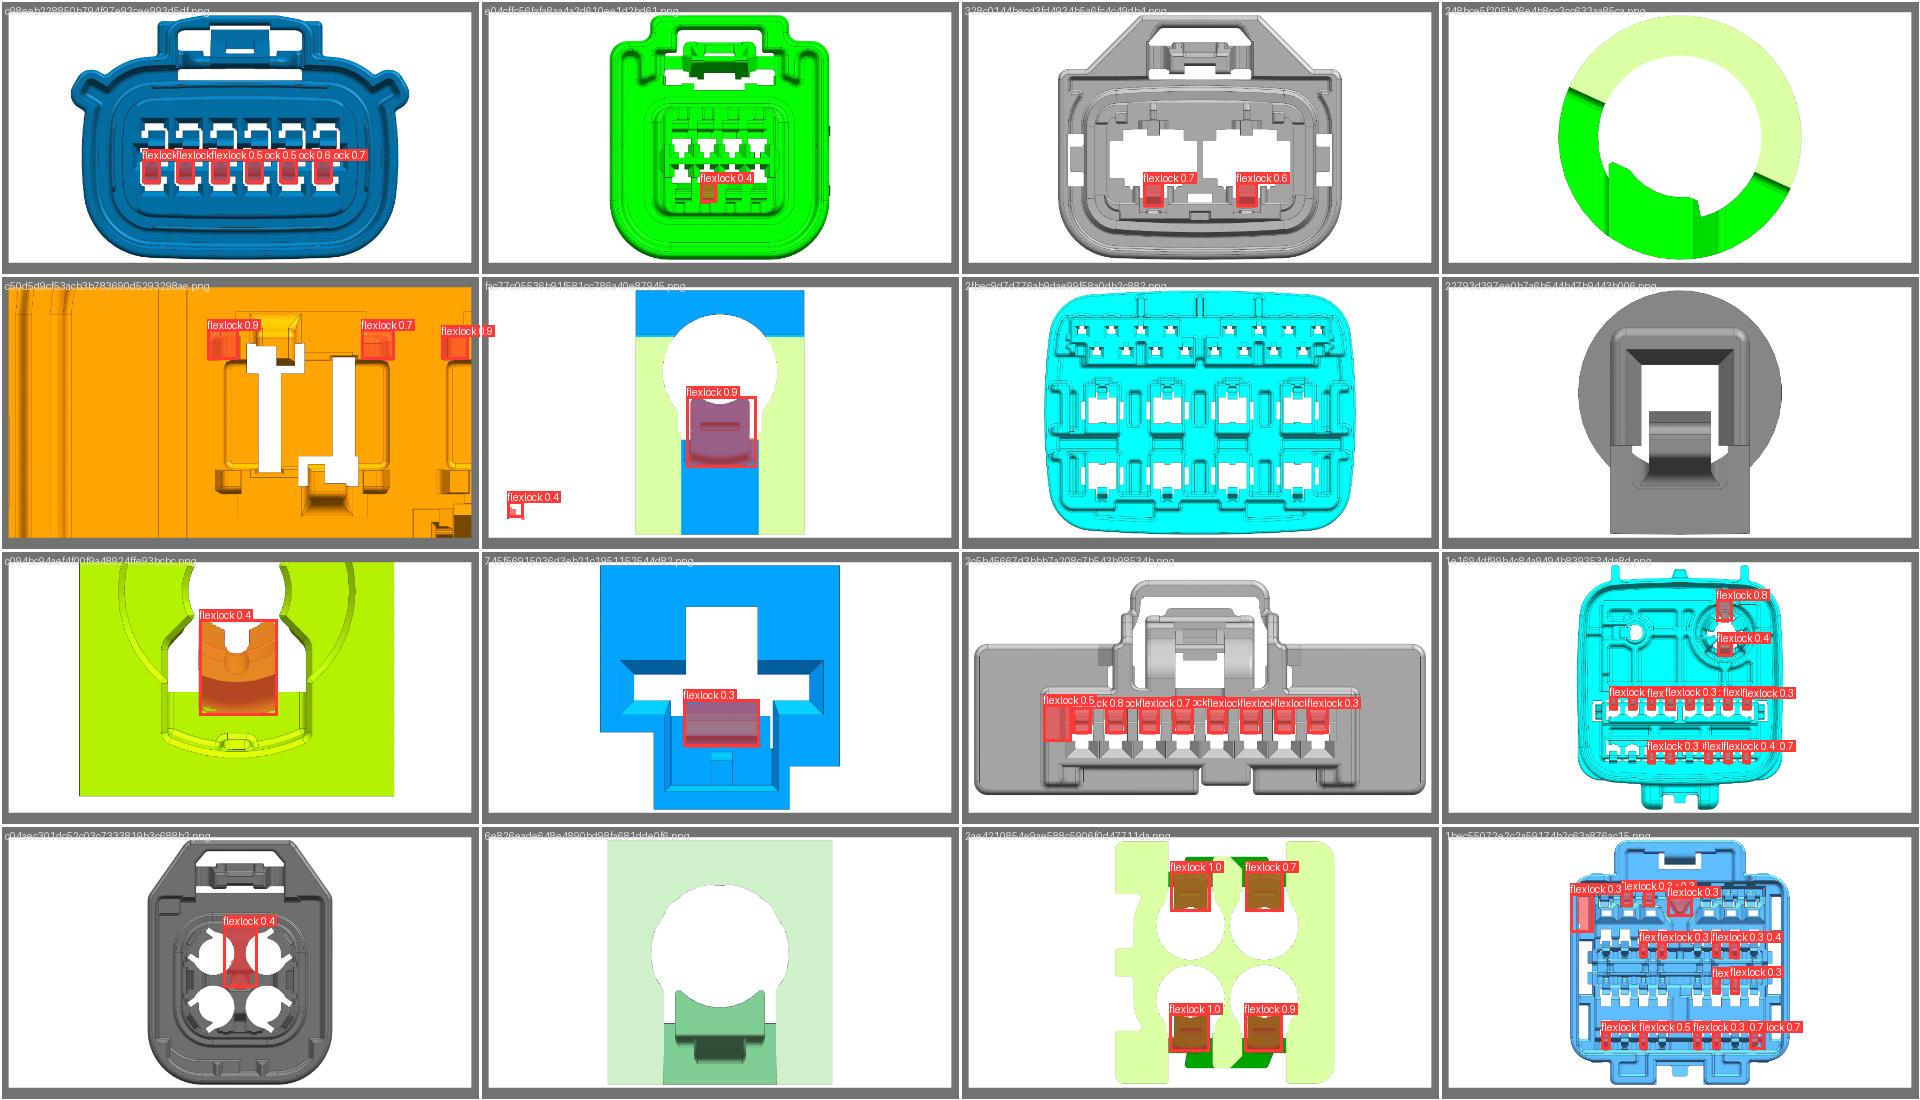
